<font size="+3"><strong>1.1. Preparing Mexico Data</strong></font>

# Import

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df1 = pd.read_csv("data/mexico-city-real-estate-1.csv")
df2 = pd.read_csv("data/mexico-city-real-estate-2.csv")

### Concatenate Datasets

In [8]:
df= pd.concat([df1, df2])

In [9]:
df.shape

(9256, 17)

In [10]:
df.to_csv("data/mexico-city-real-estate-1&2.csv")

In [11]:
df.head()

Unnamed: 0 operation property_type  \
0           1      sell     apartment   
1           2      sell         house   
2           3      sell     apartment   
3           4      sell     apartment   
4           5      sell     apartment   

                    place_with_parent_names                 lat-lon  \
0  |Miguel Hidalgo|Distrito Federal|M√©xico|   23.634501,-102.552788   
1      |Iztapalapa|Distrito Federal|M√©xico|     19.31033,-99.068557   
2         |Tlalpan|Distrito Federal|M√©xico|    19.279771,-99.234597   
3  |Miguel Hidalgo|Distrito Federal|M√©xico|   23.634501,-102.552788   
4       |Benito Ju√°rez|Quintana Roo|M√©xico|  21.1902642,-86.8198375   

       price currency  price_aprox_local_currency  price_aprox_usd  \
0  5500000.0      MXN                  5450245.50        289775.66   
1  1512000.0      MXN                  1498321.97         79661.96   
2   926667.0      MXN                   918284.00         48822.82   
3  6410000.0      MXN                  6352013.39        337720.36   
4   875000.0      USD                 16457437.50        875000.00   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
0                  NaN                   54.0               NaN   
1                  NaN                   80.0               NaN   
2                  NaN                  100.0               NaN   
3                  NaN                  135.0               NaN   
4                  0.0                  263.0               NaN   

    price_per_m2  floor  rooms  expenses  \
0  101851.851900    NaN    NaN       NaN   
1   18900.000000    NaN    NaN       NaN   
2    9266.670000    NaN    NaN       NaN   
3   47481.481480    NaN    NaN       NaN   
4    3326.996198    NaN    NaN       NaN   

                                       properati_url  
0  http://miguel-hidalgo-df.properati.com.mx/o3zb...  
1  http://iztapalapa.properati.com.mx/q7t0_venta_...  
2  http://tlalpan.properati.com.mx/qbi4_venta_dep...  
3  http://miguel-hidalgo-df.properati.com.mx/opeq...  
4  http://cancun.properati.com.mx/hg4t_venta_depa...

## Clean `Data Cleaning`

In [12]:
df.isnull().sum()

Unnamed: 0                       0
operation                        0
property_type                    0
place_with_parent_names          0
lat-lon                        967
price                          166
currency                       166
price_aprox_local_currency     166
price_aprox_usd                166
surface_total_in_m2           5807
surface_covered_in_m2          375
price_usd_per_m2              6846
price_per_m2                   745
floor                         8643
rooms                         9003
expenses                      9250
properati_url                    0
dtype: int64

In [13]:
df.drop(columns=["Unnamed: 0", "operation", "currency", "price", "price_aprox_local_currency","price_usd_per_m2", "price_per_m2", "floor", "rooms", "expenses", "properati_url"], inplace= True)

In [14]:
df.drop(columns=["surface_total_in_m2"],inplace= True)

In [15]:
df.dropna(inplace= True)

In [16]:
df.isnull().sum()

property_type              0
place_with_parent_names    0
lat-lon                    0
price_aprox_usd            0
surface_covered_in_m2      0
dtype: int64

In [17]:
df.shape

(7841, 5)

In [18]:
df["state"]=df["place_with_parent_names"].str.split('|').str[2]

In [19]:
df.drop(columns=["place_with_parent_names"], inplace = True)

In [20]:
df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df.drop(columns=["lat-lon"], inplace = True)

In [21]:
df.head()

property_type  price_aprox_usd  surface_covered_in_m2             state  \
0     apartment        289775.66                   54.0  Distrito Federal   
1         house         79661.96                   80.0  Distrito Federal   
2     apartment         48822.82                  100.0  Distrito Federal   
3     apartment        337720.36                  135.0  Distrito Federal   
4     apartment        875000.00                  263.0      Quintana Roo   

         lat         lon  
0  23.634501 -102.552788  
1  19.310330  -99.068557  
2  19.279771  -99.234597  
3  23.634501 -102.552788  
4  21.190264  -86.819838

Exploratory Analysis

In [22]:
df.describe()

price_aprox_usd  surface_covered_in_m2          lat          lon
count     7.841000e+03           7.841000e+03  7841.000000  7841.000000
mean      2.718857e+05           5.225751e+02    19.741143   -97.109223
std       5.488884e+05           2.145636e+04     0.823466     4.693393
min       6.585810e+03           0.000000e+00    18.015418  -102.886125
25%       6.217005e+04           6.900000e+01    19.362864   -99.188522
50%       1.296088e+05           1.000000e+02    19.400959   -99.152303
75%       2.628766e+05           2.080000e+02    19.474446   -99.094990
max       2.008064e+07           1.730000e+06    23.634501   -86.744919

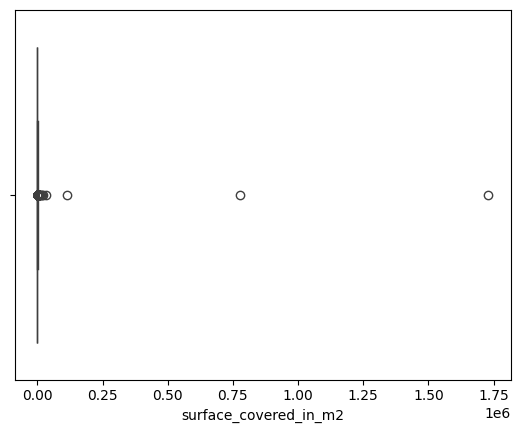

In [23]:
sns.boxplot(x="surface_covered_in_m2",data= df);

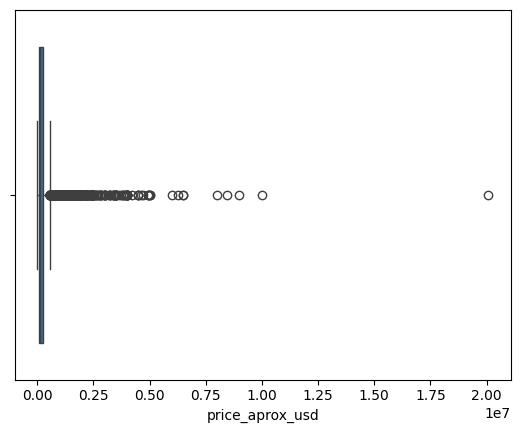

In [24]:
sns.boxplot(x="price_aprox_usd",data= df);

In [25]:
q1 = df["surface_covered_in_m2"].quantile(0.25)
q3 = df["surface_covered_in_m2"].quantile(0.75)
iqr = q3-q1
max_range = q3+(1.5*iqr)
df = df[df["surface_covered_in_m2"]<=max_range]

In [61]:
df.isnull().sum()

property_type            0
price_aprox_usd          0
surface_covered_in_m2    0
state                    0
lat                      0
lon                      0
dtype: int64

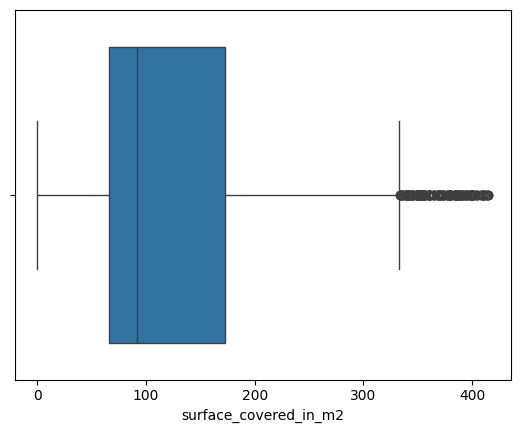

In [27]:
sns.boxplot(x="surface_covered_in_m2",data= df);

In [32]:
df["price_aprox_usd"] = df["price_aprox_usd"] - (df["price_aprox_usd"].mean()/ df["price_aprox_usd"].std())

In [40]:
Q1 = df["price_aprox_usd"].quantile(0.25)
Q3 = df["price_aprox_usd"].quantile(0.75)
IQR= Q3-Q1
MaxRan = Q3 + (1.5*IQR)
df = df[df["price_aprox_usd"]<=MaxRan]

In [41]:
df.head()

property_type  price_aprox_usd  surface_covered_in_m2             state  \
0     apartment    289774.949313                   54.0  Distrito Federal   
1         house     79661.249313                   80.0  Distrito Federal   
2     apartment     48822.109313                  100.0  Distrito Federal   
3     apartment    337719.649313                  135.0  Distrito Federal   
5     apartment    232662.799313                   87.0  Distrito Federal   

         lat         lon  
0  23.634501 -102.552788  
1  19.310330  -99.068557  
2  19.279771  -99.234597  
3  23.634501 -102.552788  
5  19.432657  -99.177444

In [42]:
df.describe()

price_aprox_usd  surface_covered_in_m2          lat          lon
count      6683.000000            6683.000000  6683.000000  6683.000000
mean     138618.083014             118.685171    19.707560   -97.302818
std      105028.673680              79.582976     0.793828     4.501480
min        6585.099313               0.000000    18.015418  -102.886125
25%       55320.089313              65.000000    19.362690   -99.180757
50%      104845.389313              90.000000    19.399120   -99.149236
75%      192304.949313             150.000000    19.470215   -99.098758
max      476925.039313             415.000000    23.634501   -86.745197

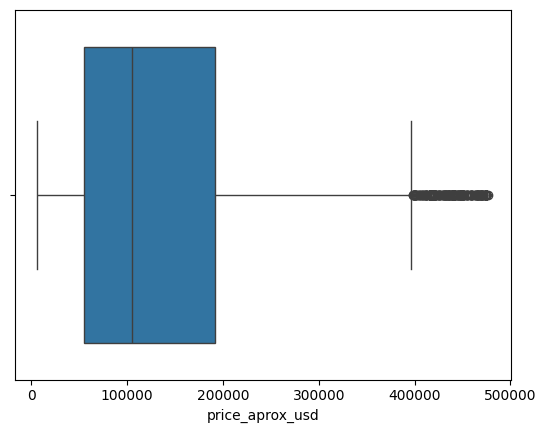

In [43]:
sns.boxplot(x="price_aprox_usd",data= df);

Graphs

In [45]:
df[["surface_covered_in_m2","price_aprox_usd"]].describe()

surface_covered_in_m2  price_aprox_usd
count            6683.000000      6683.000000
mean              118.685171    138618.083014
std                79.582976    105028.673680
min                 0.000000      6585.099313
25%                65.000000     55320.089313
50%                90.000000    104845.389313
75%               150.000000    192304.949313
max               415.000000    476925.039313

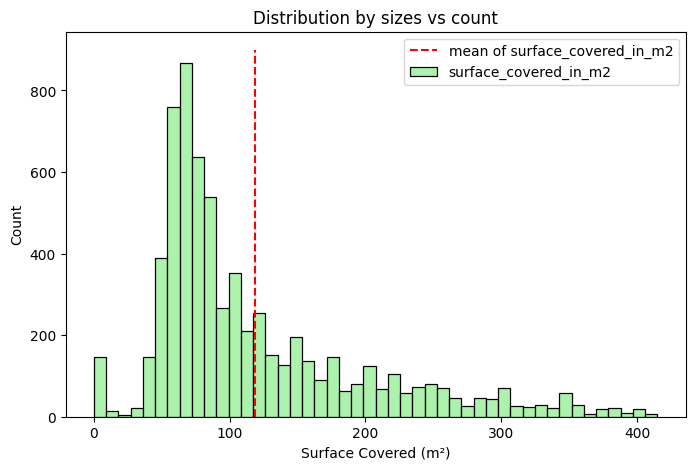

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(x= "surface_covered_in_m2", data= df, color='lightgreen', edgecolor='black', label="surface_covered_in_m2")
plt.xlabel("Surface Covered (m¬≤)")
plt.ylabel("Count")
plt.title("Distribution by sizes vs count")
mn = np.mean(df["surface_covered_in_m2"])
plt.plot([mn for i in range(0,900)], [i for i in range(0,900)], "r--", label="mean of surface_covered_in_m2")
plt.legend()
plt.show()

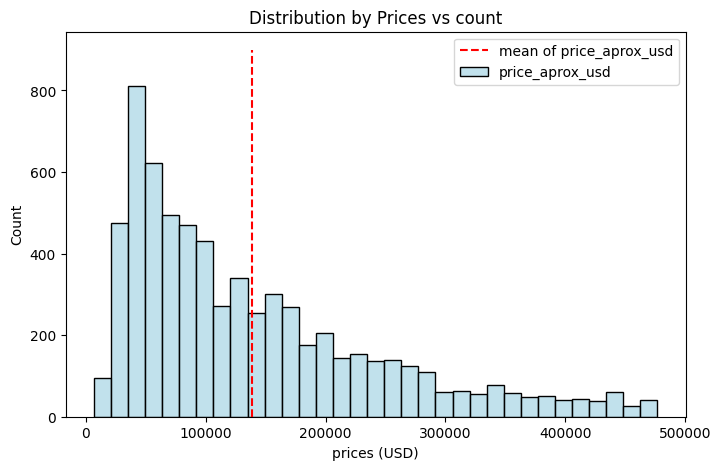

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(x= "price_aprox_usd", data= df, color='lightblue', edgecolor='black', label="price_aprox_usd")
plt.xlabel("prices (USD)")
plt.ylabel("Count")
plt.title("Distribution by Prices vs count")
mn = np.mean(df["price_aprox_usd"])
plt.plot([mn for i in range(0,900)], [i for i in range(0,900)], "r--", label="mean of price_aprox_usd")
plt.legend()
plt.show()

<font size="+3"><strong>1.4. Location or Size: What Influences House Prices in Mexico?</strong></font>

# Research Question 1

**Which state is most expensive real estate market?**

In [60]:
mean_price_by_state = df.groupby("state")["price_aprox_usd"].mean().sort_values(ascending= False)
mean_price_by_state

state
Solidaridad         212664.732016
Quintana Roo        193156.429020
Distrito Federal    128960.715252
Oth√≥n P. Blanco     126446.845980
Zacatecas            93577.262126
Benito Ju√°rez        66167.507244
Name: price_aprox_usd, dtype: float64

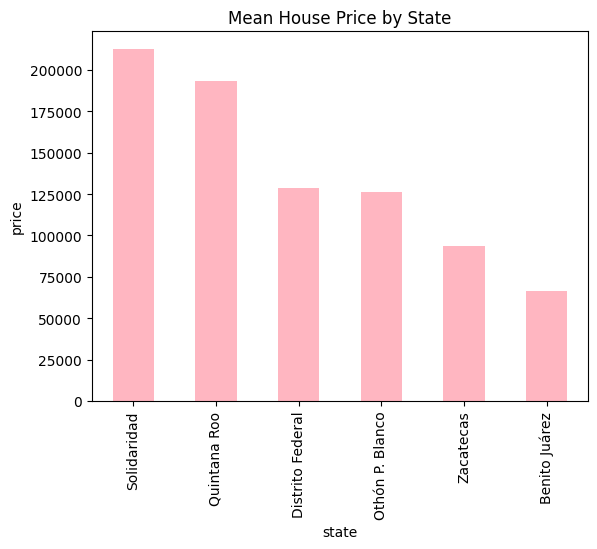

In [64]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="price",
    color = "lightpink",
    title="Mean House Price by State"
);

In [65]:
df["price_per_m2"] = df['price_aprox_usd']/df['surface_covered_in_m2']

In [72]:
df = df[df["surface_covered_in_m2"] != 0]

In [73]:
df.shape

(6542, 7)

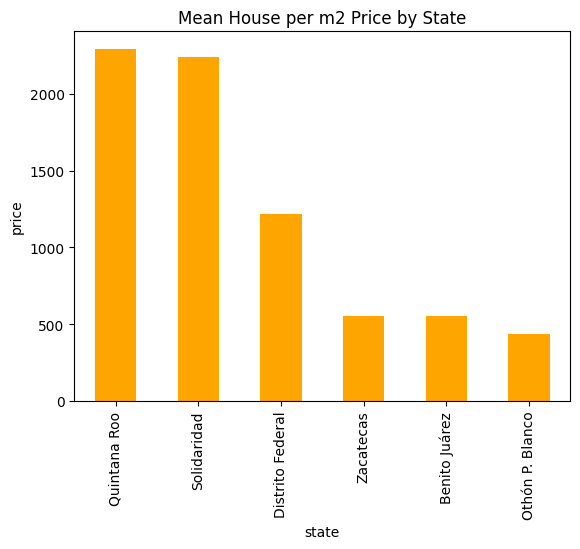

In [82]:
df.groupby("state")["price_per_m2"].mean().sort_values(ascending= False).plot(
    kind="bar",
    xlabel="state",
    ylabel="price",
    color = "orange",
    title="Mean House per m2 Price by State"
);

By this we get to see Solidaridad and Quintana Roo are Top than Federal Distrito:

**Tourism and Luxury Real Estate in Solidaridad and Quintana Roo**

‚ûä Solidaridad includes Playa del Carmen, and Benito Ju√°rez includes Canc√∫n ‚Äî two of the most visited international beach destinations in Mexico.

‚ûã These areas have a strong demand for luxury apartments, resorts, and vacation homes, often targeted at foreign buyers and wealthy investors.

**Distrito Federal (CDMX) has a more diverse housing market:**

‚ûä CDMX has a wide range of housing options ‚Äî from upscale Polanco condos to lower-income areas ‚Äî which brings the average price per m¬≤ down.

‚ûã While luxury areas in CDMX (like Roma, Condesa, Santa Fe) are expensive, many other neighborhoods have more affordable housing, creating a lower average.

# Research Question 2

**Is there a relationship between home size and price?**

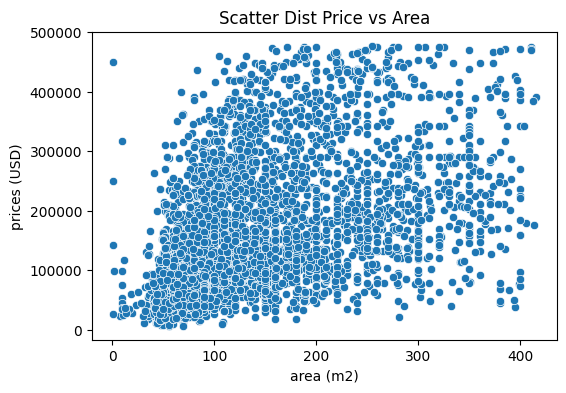

In [85]:
plt.figure(figsize= (6,4))
sns.scatterplot(x="surface_covered_in_m2",y="price_aprox_usd",data= df)
plt.xlabel("area (m2)")
plt.ylabel("prices (USD)")
plt.title("Scatter Dist Price vs Area")
plt.show()

In [86]:
p_correlation = df["surface_covered_in_m2"].corr(df["price_aprox_usd"])
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5388061942865144


Therefore, Moderate correlation

Let us evaluate for Mexico city Distrito Federal 

df_mexico_city shape: (5524, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 54.62006700613086


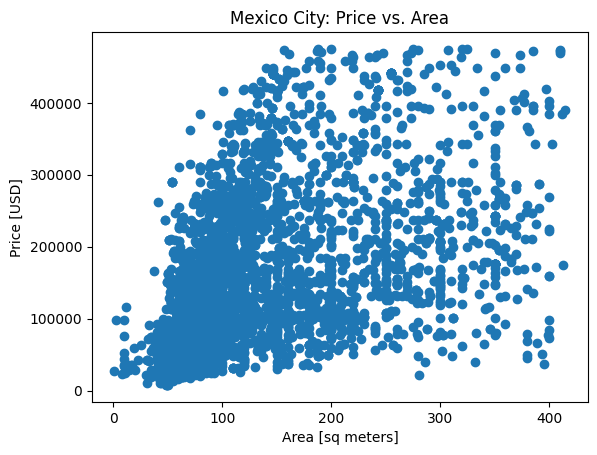

In [89]:
df_mexico_city = df[df["state"]=="Distrito Federal"]
print("df_mexico_city shape:", df_mexico_city.shape)

plt.scatter(df_mexico_city["surface_covered_in_m2"], df_mexico_city["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area")
            
p_correlation = df_mexico_city["price_aprox_usd"].corr(df_mexico_city["surface_covered_in_m2"]) *100
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Moderate relation

In [92]:
states_corr = {}
list_state = df["state"].unique()
for place in list_state:
    area = df[df["state"]==place]
    p_correlation = area["price_aprox_usd"].corr(area["surface_covered_in_m2"])
    states_corr[place] = float(p_correlation.round(2))

states_corr

{'Distrito Federal': 0.55,
 'Quintana Roo': 0.42,
 'Solidaridad': 0.23,
 'Zacatecas': 0.62,
 'Benito Ju√°rez': 0.77,
 'Oth√≥n P. Blanco': 0.94}

### üìä Correlation Between Price and Area (m¬≤) Across Mexican States

The correlation values between property **price** and **area in square meters (m¬≤)** vary across different states in Mexico. These values reflect how strongly the size of a house influences its price in each region.

#### üîé Summary of Correlation Values:
- **Oth√≥n P. Blanco**: 0.94
- **Benito Ju√°rez**: 0.77
- **Zacatecas**: 0.62
- **Distrito Federal**: 0.55
- **Quintana Roo**: 0.42
- **Solidaridad**: 0.23

#### üß† Interpretation:

- The highest correlation is seen in **Oth√≥n P. Blanco (0.94)**, indicating a **very strong relationship** between house size and price ‚Äî larger houses tend to be much more expensive here.
- **Benito Ju√°rez** and **Zacatecas** also show **strong correlations**, suggesting that **area is a significant factor** in determining price.
- In contrast, **Solidaridad (0.23)** shows a **weak correlation**, implying that **factors other than size** (such as location, amenities, or tourism appeal) may influence prices more heavily.

#### üè° Conclusion:

Overall, the correlation data suggests that **in many Mexican states, larger house size often leads to higher prices**, but **the degree of influence varies** by region. In some places, **location plays a more dominant role than size** in determining property value.
